In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
loan=pd.read_csv('./Loan.csv')

/Users/wenze/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
61676/256984

0.23999937739314509

In [4]:
loan.isnull().sum()

Loan ID                              0
Customer ID                          0
Loan Status                          0
Current Loan Amount                  0
Term                                 0
Credit Score                     61676
Years in current job                 0
Home Ownership                       0
Annual Income                    61676
Purpose                              0
Monthly Debt                         0
Years of Credit History              0
Months since last delinquent    140383
Number of Open Accounts              0
Number of Credit Problems            0
Current Credit Balance               0
Maximum Open Credit                  0
Bankruptcies                       529
Tax Liens                           23
dtype: int64

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256984 entries, 0 to 256983
Data columns (total 19 columns):
Loan ID                         256984 non-null object
Customer ID                     256984 non-null object
Loan Status                     256984 non-null object
Current Loan Amount             256984 non-null int64
Term                            256984 non-null object
Credit Score                    195308 non-null float64
Years in current job            256984 non-null object
Home Ownership                  256984 non-null object
Annual Income                   195308 non-null float64
Purpose                         256984 non-null object
Monthly Debt                    256984 non-null object
Years of Credit History         256984 non-null float64
Months since last delinquent    116601 non-null float64
Number of Open Accounts         256984 non-null int64
Number of Credit Problems       256984 non-null int64
Current Credit Balance          256984 non-null int64
Maximum O

In [6]:
loan.columns

Index(['Loan ID', 'Customer ID', 'Loan Status', 'Current Loan Amount', 'Term',
       'Credit Score', 'Years in current job', 'Home Ownership',
       'Annual Income', 'Purpose', 'Monthly Debt', 'Years of Credit History',
       'Months since last delinquent', 'Number of Open Accounts',
       'Number of Credit Problems', 'Current Credit Balance',
       'Maximum Open Credit', 'Bankruptcies', 'Tax Liens'],
      dtype='object')

In [7]:
loan.columns = [c.replace(' ', '_') for c in loan.columns]

In [8]:
loan.head(3)

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Years_in_current_job,Home_Ownership,Annual_Income,Purpose,Monthly_Debt,Years_of_Credit_History,Months_since_last_delinquent,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0


In [49]:
#split data into numerical 

99999999.0

In [ ]:
loan.select.dyptes(exclude:[''])

In [9]:
#loan Purpose

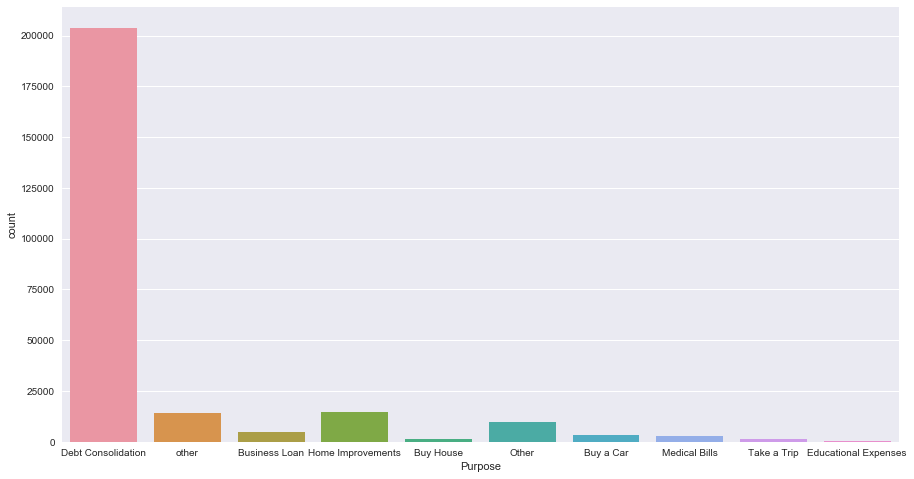

In [10]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(loan['Purpose']);

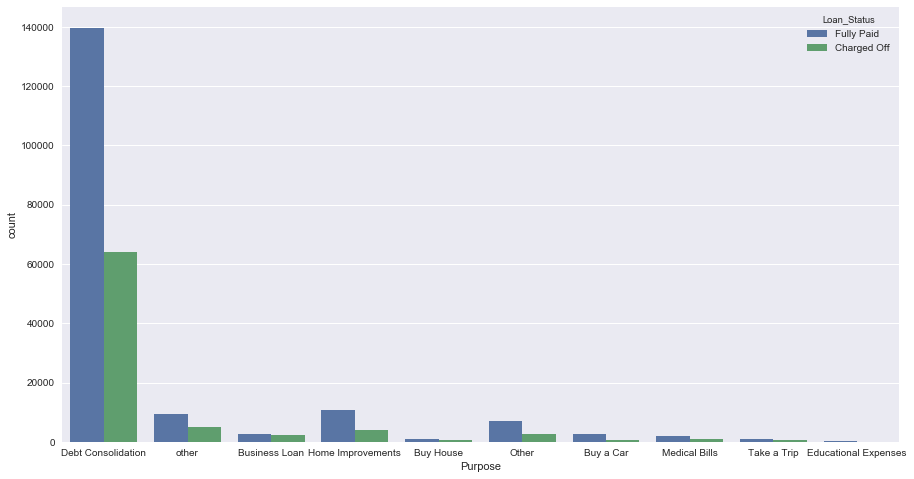

In [11]:
plt.figure(figsize=(15,8))
sns.countplot(x='Purpose',hue='Loan_Status',data=loan);
#x,y,hue='Purpose','Proportion','Loan Status'
#hue_order=['Fully Paid','Charged Off']
#loan[x].groupby(loan[hue]).value_counts(normalize=True).rename(y).reset_index().pipe((sns.barplot,"data"),x=x,y=y,hue=hue);

Majority of the people who apply for loan is for Debt Consolidation, others are mainly home improvement. But from this attribute it is hard to tell whether a customer is good or bad.

In [12]:
#Bankruptcies

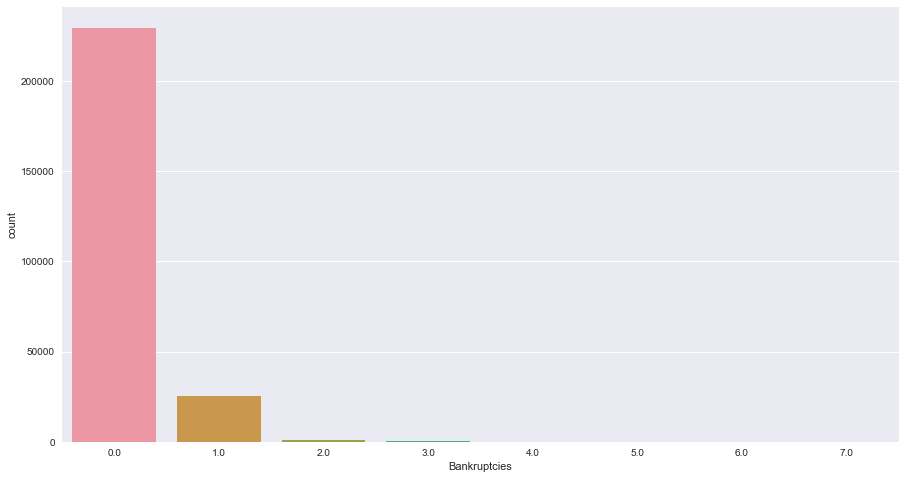

In [13]:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(loan['Bankruptcies']);

In [14]:
# for those who has a history of Bankruptcies should bring negative contribution on the quality 
# of a customer. 

In [15]:
#loan Status

In [16]:
loan['Loan_Status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

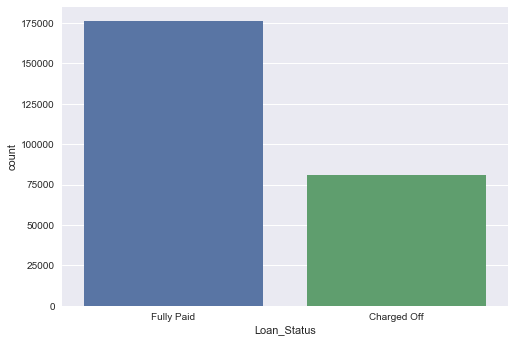

In [17]:
sns.set(style="darkgrid")
sns.countplot(loan['Loan_Status']);

In [18]:
Fully_paid=loan[loan['Loan_Status']=='Fully Paid'].shape[0]
Fully_paid_ratio=Fully_paid/loan['Loan_Status'].shape[0]*100
print('Fully Paid peope Ratio: %.2f%%' %Fully_paid_ratio)

Fully Paid peope Ratio: 68.56%


In [19]:
# For those who are fully paid customer should be categorized as a good customer. 
#Maybe I should study their financial status and use their features to categorize a good or bad
#customer.

In [20]:
#years in current job

In [21]:
loan['Years_in_current_job'].unique()

array(['10+ years', '4 years', '6 years', '5 years', 'n/a', '3 years',
       '2 years', '< 1 year', '1 year', '7 years', '9 years', '8 years'], dtype=object)

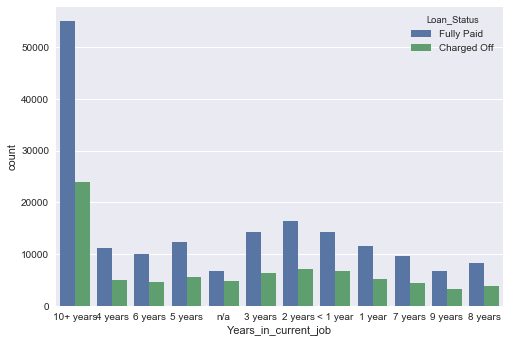

In [22]:
sns.set(style="darkgrid")
sns.countplot(x='Years_in_current_job',hue='Loan_Status',data=loan);

For those who has work in the same job longer, they are more likely to pay off their loan. 
Therefore, Years in current job will be used as an important attribute to tell customer quality.

# Fill in the missing value:

In [23]:
loan.isnull().sum()

Loan_ID                              0
Customer_ID                          0
Loan_Status                          0
Current_Loan_Amount                  0
Term                                 0
Credit_Score                     61676
Years_in_current_job                 0
Home_Ownership                       0
Annual_Income                    61676
Purpose                              0
Monthly_Debt                         0
Years_of_Credit_History              0
Months_since_last_delinquent    140383
Number_of_Open_Accounts              0
Number_of_Credit_Problems            0
Current_Credit_Balance               0
Maximum_Open_Credit                  0
Bankruptcies                       529
Tax_Liens                           23
dtype: int64

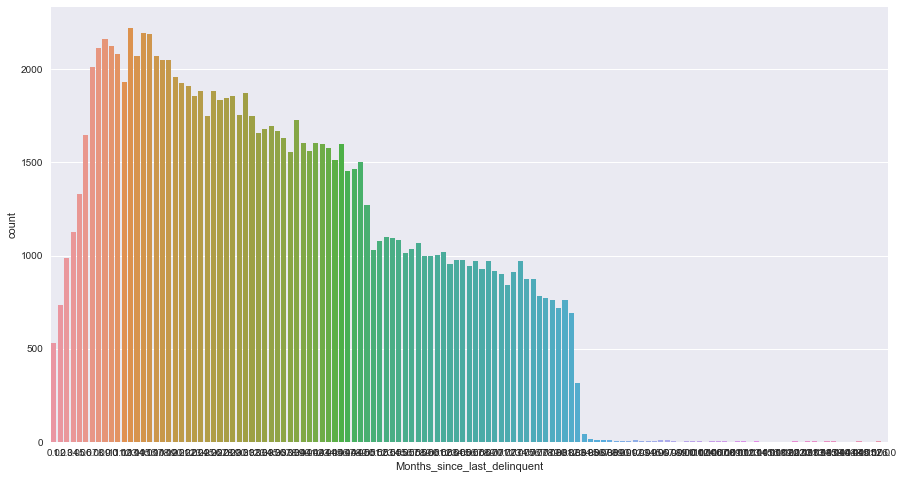

In [24]:
plt.figure(figsize=(15,8))
sns.countplot(x=loan['Months_since_last_delinquent']);

In [25]:
#credit score-fix missing value: not gonna work

In [26]:
#credit_score_clean=loan.groupby(['Maximum_Open_Credit','Years_of_Credit_History','Years_in_current_job',"Monthly_Debt"])

In [27]:
#credit_score_clean.Credit_Score.median()

In [28]:
#loan['Credit_Score']=loan.groupby(['Years_of_Credit_History',
#                                   'Years_in_current_job',
#                                   "Monthly_Debt",
#                                  'Maximum_Open_Credit']).transform(lambda x: x.fillna(x.median()))

In [31]:
credit_score_clean=loan.groupby(["Loan_Status","Years_of_Credit_History","Maximum_Open_Credit"])
credit_score_clean.Credit_Score.median()

Loan_Status  Years_of_Credit_History  Maximum_Open_Credit
Charged Off  4.2                      5551                    724.0
                                      24945                   689.0
             4.3                      12867                  6550.0
                                      19059                   677.0
                                      11817                   707.0
             4.4                      4992                    678.0
                                      6411                    726.0
                                      13276                  3960.0
             4.5                      1957                   3866.5
                                      2247                    699.0
                                      2833                    723.0
                                      4524                   6700.0
                                      4901                    713.0
                                      4914                

In [32]:
loan['Credit_Score']=loan.groupby(["Loan_Status","Years_of_Credit_History","Maximum_Open_Credit"]).transform(lambda x: x.fillna(x.median()))

In [ ]:
#Annual Income-Fill in missing data

In [33]:
Annual_income_clean=loan.groupby(["Loan_Status","Years_in_current_job","Maximum_Open_Credit","Current_Credit_Balance"])
Annual_income_clean.Annual_Income.median()

Loan_Status  Years_in_current_job  Maximum_Open_Credit  Current_Credit_Balance
Charged Off  1 year                0                    0                          30633.0
                                   776                  276                        35319.0
                                   811                  550                        30414.0
                                   999                  729                        14391.0
                                   1013                 652                        38997.0
                                   1017                 655                        39151.0
                                   1081                 392                        98390.0
                                   1093                 442                        34822.0
                                   1095                 733                        74670.0
                                   1191                 848                        49665.0
           

In [34]:
loan['Annual_Income']=loan.groupby(["Loan_Status",
                                    "Years_in_current_job",
                                    "Maximum_Open_Credit",
                                    "Current_Credit_Balance"]).transform(lambda x: x.fillna(x.median()))

In [ ]:
#tax liens-Fill Missing Value

In [35]:
loan['Tax_Liens'].unique()

array([  0.,   5.,  nan,   1.,   2.,   4.,   3.,   6.,   7.,   9.,   8.,
        10.,  11.])

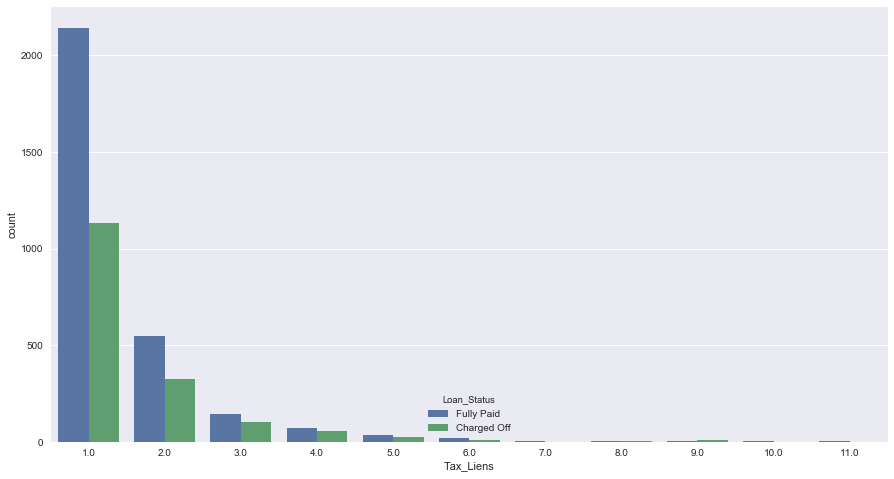

In [36]:
#Plot to see whether tax_liens will correlate with the loan status
plt.figure(figsize=(15,8))
sns.countplot(x=loan[loan['Tax_Liens']!=0.0]['Tax_Liens'],hue=loan['Loan_Status']);

### <font color='blue'>I decided to drop off "tax liens" attribute.</font><br>
I first check how many unique values under this attribute. turns out not that much 
I understand that doesn't matter how many times you get tax liens punishment, there are still same ratio of "fully paid" people and "charged off" people.

In [37]:
del loan['Tax_Liens']

In [38]:
# Months since last delinquent-Fill in Missing

In [39]:
# I want to see how mange percentage of data missing under this attribute
loan['Months_since_last_delinquent'].isnull().sum()/loan['Months_since_last_delinquent'].shape[0]

0.54627136319770886

In [40]:
del loan['Months_since_last_delinquent']

### <font color='blue'> I decide to drop off the 'Months_since_last_delinquent' attribute.</font><br>
Months since last delinquent has 54% of missing data. With so many missing data, I don't think any fill in missing value techniques will help to recover the original distribution. 

In [41]:
#Bankruptcies-Fill in Missing

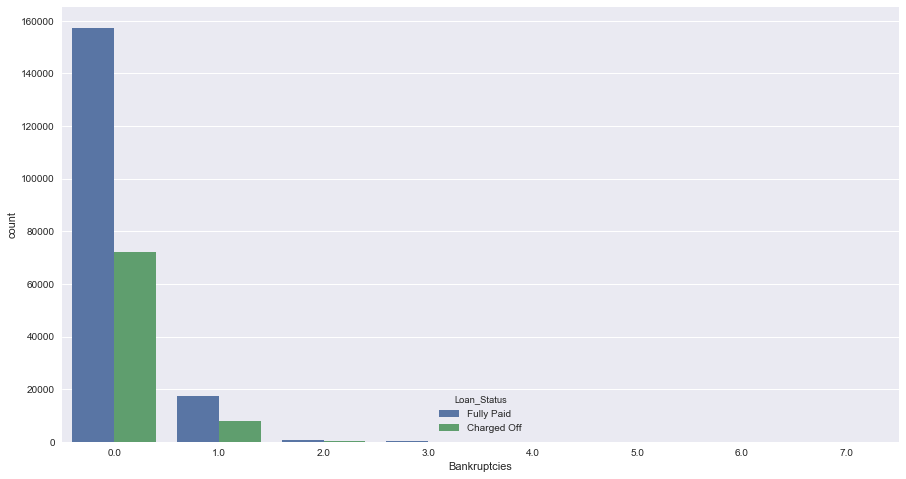

In [42]:
#Check how many unique values under 'Bankruptcies'
loan['Bankruptcies'].unique()
#check how the distribution of those values:
plt.figure(figsize=(15,8))
sns.set(style="darkgrid")
sns.countplot(x='Bankruptcies',hue='Loan_Status',data=loan);

In [43]:
#Since majority of them are 0. No bankrupt so I will fill in the missing value with 0
loan.Bankruptcies.fillna(0,inplace=True)

In [44]:
loan.isnull().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Years_in_current_job         0
Home_Ownership               0
Annual_Income                0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
dtype: int64

In [45]:
loan.to_excel('loan_cleaned.xlsx')

# ---------------------------Data Cleaning Part Finished------------------------